In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# setting seaborn theme
sns.set_theme(style='whitegrid', palette='ch:.25')

<img src='https://tse2.mm.bing.net/th?id=OIP.eRY8bxk2QZb7g-btkOS9mgHaE8&pid=Api&P=0' width='400'>

# 1. Load Data & Check Information

In [5]:
ori = pd.read_csv('weatherAUS.csv')
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Checking Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [8]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

### Checking Correlationship

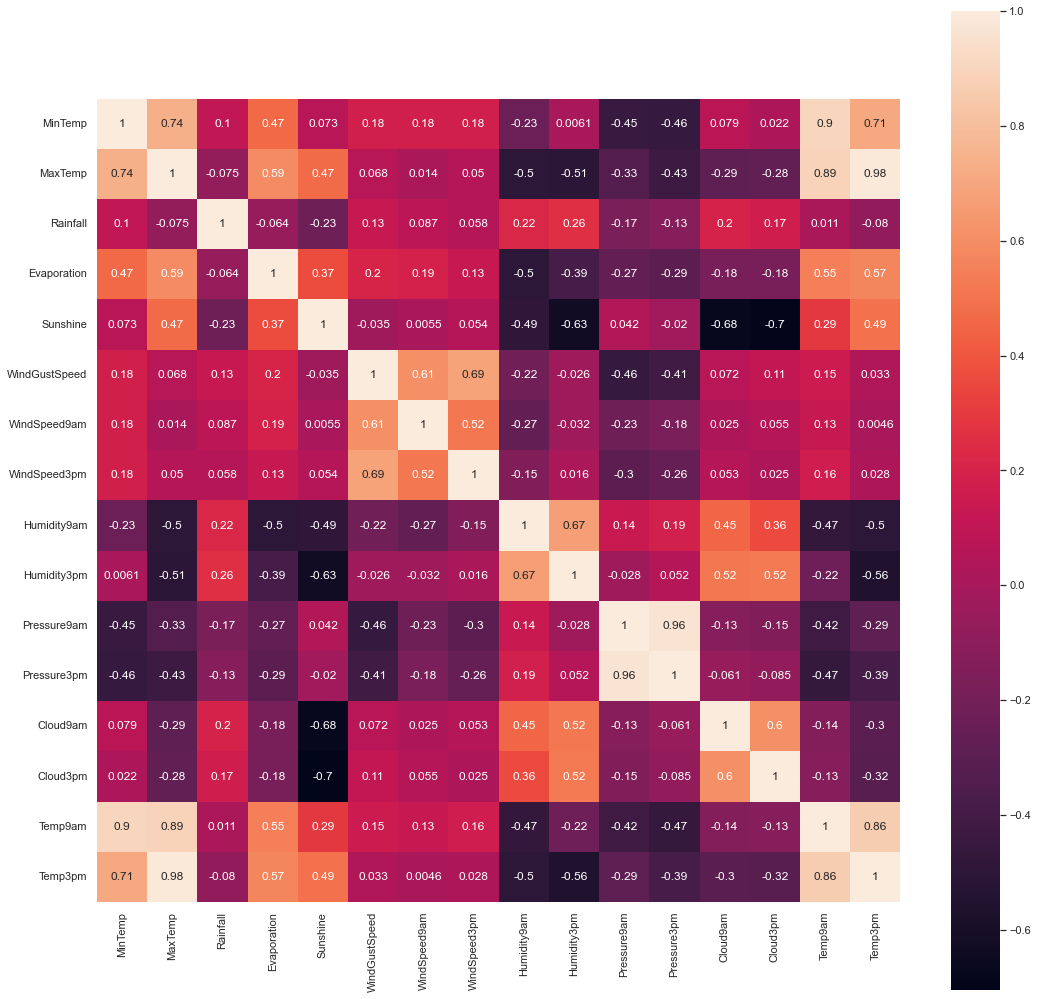

In [9]:
correlation = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True, square=True)
plt.show()

### Null Values in each column

In [10]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# 2. Data Engineering

### Dropping Some Columns

- Since `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` contain null values more than 30%, it will not help to improve out modes so they will be dropped.
- `Date` information does not needed, so this will be also dropped.

In [11]:
df = df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [12]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Handling Null Values

Handling Null Values is really important to predict the answer. <br/>
If there is null values in dataset, machine learning model will not accept to fit dataset into model.<br/> Also, it will lead to wrong prediction at the last. 
In this section, I changed null values by using 2 steps.

1. **Predict null values**<br/> 
Just replacing null values to median or mean would not increase the accuracy of model.<br/> Therefore, by using `KNeighborsRegressor`, I am going to predict missing values as much as possible.

2. **Replace to median**<br/>
After predicting null values, I am going to replace it by using `SimpleImputer`.<br/>


KNN model does not receive **object** type values, so object type values must be replaced to interger of float type.

In [13]:
cat_list = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']
for column in cat_list:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes
    #-1 represent NaN in .cat.codes. Therefore, I replaced to real NaN value
    df[column].replace(-1, np.NaN, inplace=True)

First step will be executed by `filling_null` function. <br/><br/>
Things going on in `filling_null` :
* Based on the given feature, it drops all the null variable in other features.
* Split dataset into train and test set. Train set only include non-null values for given feature, and test set only include null values for given feature.
* Run KNN model to predict null values
* Return Dataset

In [14]:
def filling_null(feature, df=df):
    
    #make train set and test set
    temp_df = df.copy().drop('RainTomorrow', axis=1)
    df_list = list(temp_df.columns)
    df_list.remove(feature)
    temp_df.dropna(subset=df_list, inplace=True)
    train = temp_df.loc[temp_df.notna()[feature]]
    train_x = train.drop(feature, axis=1)
    train_y = train[feature]
    test = temp_df[temp_df.isnull()[feature]].drop(feature,axis=1)    

    #run machine learning model and predict null values
    KNN = KNeighborsRegressor(n_jobs=-1)
    KNN.fit(train_x, train_y)
    change_NaN = KNN.predict(test)
    index_list = test.index.tolist()
    for i in range(len(change_NaN)):
        df.at[index_list[i], feature]= change_NaN[i]

    #return dataset which had been changed
    return df

Reason why I did not apply all the columns to `filling_null` function is that features not in the list, `Rainfall`, `WindGustSpeed`, `WindDir9am`, `WindDir3pm`, `Temp9am`, `Temp3pm`, `RainToday`, will have empty dataset if I drop null values from other features.

In [15]:
apply_list =['MinTemp', 'MaxTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Humidity9am',
             'Humidity3pm', 'Pressure9am', 'Pressure3pm']


for feature in apply_list:
    df = filling_null(feature = feature)

As you can see, `WindDir9am` feature has changed a lot! <br> Other features also changed, but not like `WindDir9am`. However, it is still worth it

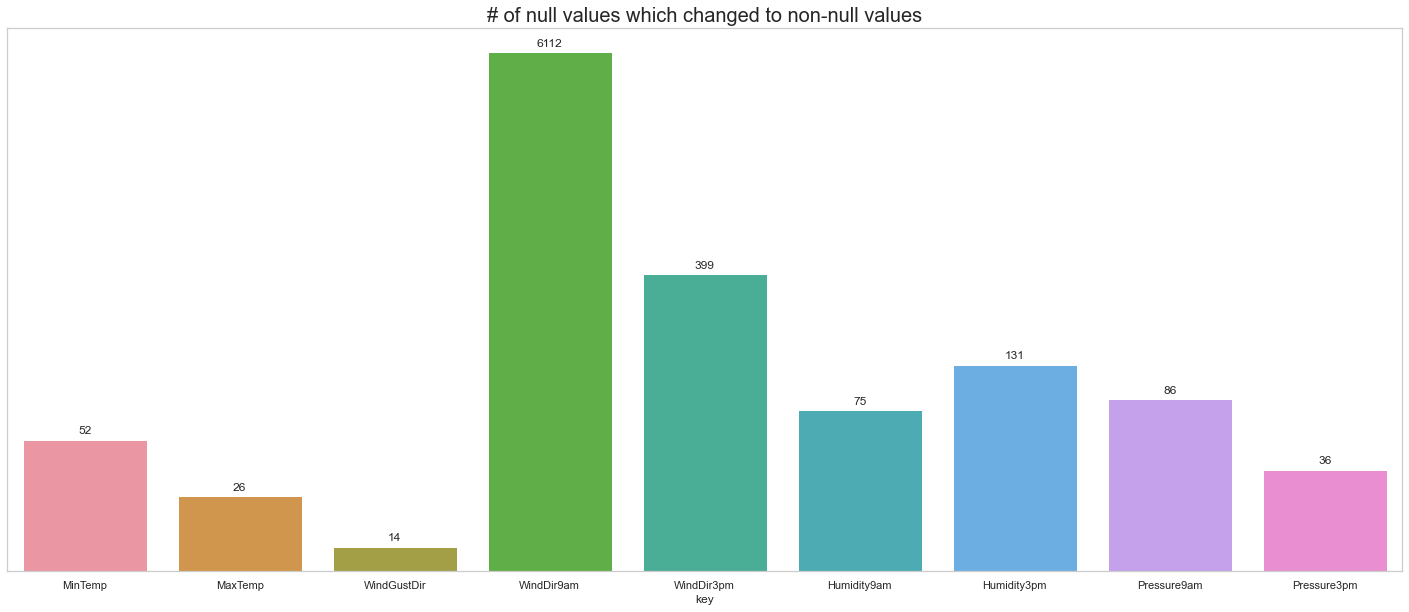

In [16]:
#getting information of number of null variable changed
df_columns = list(df.columns)
changed_dict = {}
for col in df_columns:
    changed_dict["%s" %col] = len(df[col].dropna()) - len(ori[col].dropna())

#delet features which did not changed at all
pop_list = ['Location','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
for feature in pop_list:
    changed_dict.pop(feature)

#make list of key and value to visualize the graph
key_list = []
value_list = []
for key, value in changed_dict.items():
    key_list.append(key)
    value_list.append(value)

temp_df = pd.DataFrame()
temp_df['key'] = key_list
temp_df['value'] = value_list

#visualization
plt.figure(figsize=(25, 10))
plot = sns.barplot(x='key',y='value', data=temp_df)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '0.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.yscale('log')
plot.axes.get_yaxis().set_visible(False)
plt.title('# of null values which changed to non-null values', fontsize=20)
plt.show()

Since we finished first step, we are going to do second step, which is **Replace to median**.

In [17]:
df_Xnul = df.fillna(df.median())

In [18]:
df_Xnul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int8   
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  float64
 7   WindDir3pm     145460 non-null  float64
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  float64
 17  RainTomorrow   145460 non-nul

# 3. Train & Test set
Before moving on, we need to make train and test set.

In [19]:
X = df_Xnul.drop(['RainTomorrow'], axis=1)
y = df_Xnul['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# 4. Model Selection & GridSearch
Now it's time to select best model and do some hyperparameter tuning!

In [20]:
classifier_names = ["Logistic Regression",'SGDClassifier', "Random Forest","KNN","Decision"]

classifiers = [LogisticRegression(), SGDClassifier(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

zipped_clf = zip(classifier_names,classifiers)

In [21]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [22]:
def fit_classifier(pipeline, X_train, y_train, X_test, y_test):
    model_fit = pipeline.fit(X_train, y_train)
    y_pred = model_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print()
    return accuracy

By applying 5 machine learning models, `Random Forest` gained highest accuracy score(85.29%) with default hyperparameter. </br>
Random Forest's hyperparameters will be tuned to increase the accuracy score little bit more.

In [23]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)

Validation result for Logistic Regression
LogisticRegression()
accuracy score: 84.09%

Validation result for SGDClassifier
SGDClassifier()
accuracy score: 83.89%

Validation result for Random Forest
RandomForestClassifier()
accuracy score: 85.31%

Validation result for KNN
KNeighborsClassifier()
accuracy score: 83.26%

Validation result for Decision
DecisionTreeClassifier()
accuracy score: 78.14%



In [24]:
param_list = {'min_samples_leaf':[3,6,9], 'max_depth': [5,10,None], 'criterion' : ['gini', 'entropy']}
RFC = RandomForestClassifier(n_jobs=-1, random_state=42)
clf = GridSearchCV(RFC,param_list)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'min_samples_leaf': [3, 6, 9]})

In [25]:
y_pred = clf.best_estimator_.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)*100

85.37742334662451

# Reference

* https://towardsdatascience.com/automate-the-machine-learning-model-implementation-with-sklearn-pipeline-2ef1389062c9